# Practical 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cvxopt  # needed later on
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

# Task 0: Preliminaries

This time we will work with a synthetic 2d dataset to facilitate visualization and be able to focus on the algorithms rather than spending energy to understand the dataset. The dataset consists of two classes and two predictors. Below we load the dataset and plot it.

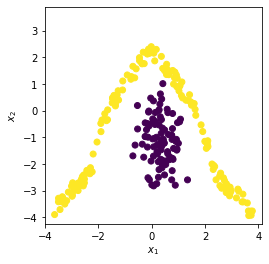

In [2]:
X_2d, t_2d = np.load('data/nonlin_2d_data.npy')[:, :2], np.load('data/nonlin_2d_data.npy')[:, 2]

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=t_2d)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('square');

### Task 0.1

Apply logistic regression and LDA to the provided data, compute classification accuracy and plot the predictions. How do they perform? You're welcome to use sklearn for this task.

In [3]:
# Split data in training and test set
def split_data(X, y, frac=0.3, seed=None):
    if seed is not None:
        np.random.seed(seed)

    ### implement the function here
    idx = np.arange(X.shape[0])
    idx_shuffled = np.random.permutation(idx)
    
    n_train = round(frac * X.shape[0])
    n_test = X.shape[0] - n_train
    
    # using the first n_train shuffled indexes for the training set
    # and the following observations for the training set
    idx_train = idx_shuffled[:n_train]
    idx_test = idx_shuffled[n_train:n_train + n_test]
    
    X_train = X[idx_train,:]
    X_test = X[idx_test,:]
    
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X_2d,t_2d,0.5,23)

In [4]:
# Logistic Regression
LR_model = LR().fit(y = y_train,X = X_train)
LR_pred_train = LR_model.predict_proba(X_train)
LR_pred_test = LR_model.predict_proba(X_test)
LR_acc_train = LR_model.score(X_train,y_train)
LR_acc_test = LR_model.score(X_test,y_test)

print("training accuracy = ",LR_acc_train)
print("testset accuracy = ",LR_acc_test)

print("Why is testset accuracy higher than the training accuracy?")

training accuracy =  0.592
testset accuracy =  0.608
Why is testset accuracy higher than the training accuracy?


In [5]:
def compute_lda_weights(x,y):
    
    # assign each observation to one class
    X_1 = x[y == True,]
    X_2 = x[y == False,]
    
    # compute means within each class
    m_1 = np.mean(X_1,axis = 0)
    m_2 = np.mean(X_2,axis = 0)
    
    # compute the variances
    def get_s(X,m):
        s = 0
        for jj in range(0,X.shape[0]):
            aux = X[jj] - m
            s = s + np.matmul(aux,aux.T)
        return s
    s_1 = get_s(X_1,m_1)
    s_2 = get_s(X_2,m_2)
    S = s_1 + s_2
    
    # compute weights
    w = 1/S * (m_2 - m_1)
    
    return m_1, m_2, w

m_0, m_1, w_lda = compute_lda_weights(X_train,y_train)

c_ = np.matmul(w_lda.T, 0.5 * (m_0 + m_1))

LDA_pred_train = np.matmul(X_train,w_lda)
LDA_pred_train_class = np.zeros(len(LDA_pred_train))
for jj in range(len(LDA_pred_train)):
    if LDA_pred_train[jj] <= c_:
        LDA_pred_train_class[jj] = 1

LDA_pred_test = np.matmul(X_test,w_lda)
LDA_pred_test_class = np.zeros(len(LDA_pred_test))
for jj in range(len(LDA_pred_test)):
    if LDA_pred_test[jj] <= c_:
        LDA_pred_test_class[jj] = 1
        
wrong_train = LDA_pred_train_class != y_train
wrong_test = LDA_pred_test_class != y_test     

LDA_acc_train = 1 - sum(wrong_train)/len(wrong_train)
LDA_acc_test = 1 - sum(wrong_test)/len(wrong_test)

print("training accuracy = ",LDA_acc_train)
print("testset accuracy = ",LDA_acc_test)

training accuracy =  0.528
testset accuracy =  0.472


In [6]:
# LDA
LDA_model_sklearn = LDA().fit(y = y_train,X = X_train)
LDA_pred_train_sklearn = LDA_model_sklearn.predict_proba(X_train)
LDA_pred_test_sklearn = LDA_model_sklearn.predict_proba(X_test)
LDA_acc_train_sklearn = LDA_model_sklearn.score(X_train,y_train)
LDA_acc_test_sklearn = LDA_model_sklearn.score(X_test,y_test)

print("training accuracy = ",LDA_acc_train_sklearn)
print("testset accuracy = ",LDA_acc_test_sklearn)

print("why are the results from my implementation so different from the ones with SKlearn???")
print("Why does the Sklearn implementation yield the same results as logistic regression?")

training accuracy =  0.592
testset accuracy =  0.608
why are the results from my implementation so different from the ones with SKlearn???
Why does the Sklearn implementation yield the same results as logistic regression?


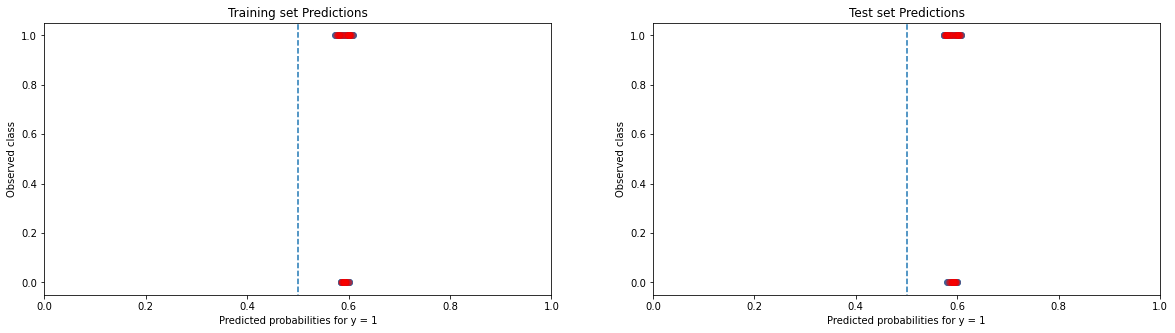

LDA from the sklearn library and LR yield exactly the same predictions. 


In [7]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
ax[0].scatter(LR_pred_train[:,1],y_train)
ax[0].scatter(LDA_pred_train_sklearn[:,1],y_train,c = "red",alpha = 0.1)
ax[0].axis([0, 1, -0.05, 1.05])
ax[0].axvline(x= .5,ymin = -0.05,ymax = 1.05, linestyle = "dashed")
ax[0].set_xlabel("Predicted probabilities for y = 1")
ax[0].set_ylabel("Observed class")
ax[0].set_title("Training set Predictions")

ax[1].scatter(LR_pred_test[:,1],y_test)
ax[1].scatter(LDA_pred_test_sklearn[:,1],y_test,c = "red",alpha = 0.1)
ax[1].axis([0, 1, -0.05, 1.05])
ax[1].axvline(x= .5,ymin = -0.05,ymax = 1.05, linestyle = "dashed")
ax[1].set_xlabel("Predicted probabilities for y = 1")
ax[1].set_ylabel("Observed class")
ax[1].set_title("Test set Predictions")

plt.show()
print("LDA from the sklearn library and LR yield exactly the same predictions. ")

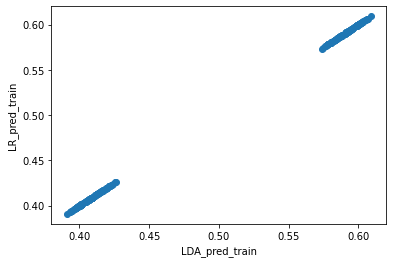

In [8]:
plt.scatter(LDA_pred_train_sklearn,LR_pred_train)
plt.xlabel("LDA_pred_train")
plt.ylabel("LR_pred_train")
plt.show()

### Task 0.2

Implement the Gaussian RBF and visualize the pairwise similarities of `x`.

In [9]:
x = np.stack([np.sin(np.linspace(0, 8, 15)), np.cos(np.linspace(0, 7, 15))]).T

In [10]:
# RBF kernel
def rbf_kernel(x,x_prime,gamma = 1/2):
    """note: x and x_prime are two samples in the feature space"""
    aux = x - x_prime
    kern = np.exp(- gamma * np.matmul(aux.T,aux))
    return kern

kern_matrix = np.zeros((len(x),len(x)))
for jj in range(len(x)):
    for ii in range(len(x)):
        kern_matrix[(jj,ii)] = rbf_kernel(x[jj],x[ii])
kern_matrix = 1-kern_matrix

Note to myself: 
Note that the RBF kernel between two samples is the distance between these two samples in infinite space!

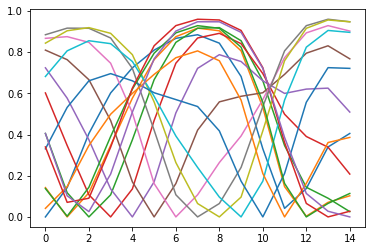

In [11]:
# Visualize pairwise similarities
#import networkx as nx
#G=nx.from_numpy_matrix(kern_matrix)
#nx.draw(G)
plt.plot(kern_matrix)
plt.show()

# Task 1: Kernel Discriminant Analysis

We will be implementing Kernel Discriminant Analysis, a nonlinear extension to LDA based on the kernel trick, following the original paper by Mika, Rätsch, Weston, Schölkopf and Müller (PDF on StudIP). Note, this is the original notation from the paper, mind the difference betweeen the matrix $M$ and the vectors $M_1, M_2$.

The goal of Kernel Discriminant Analysis is find a vector of $\alpha$'s that maximizes
$$ J(\alpha) = \frac{\alpha^T M \alpha}{\alpha^T N \alpha} $$
where
$$M := (M_1 - M_2)(M_1 - M_2)^T \text{ with } (M_i)_j = \frac{1}{l_i} \sum_{k=1}^{l_i} k(x_j, x_k^i)$$ and
$$N= \sum_{j=1,2} K_j (I - 1_{l_j}) K_j^T$$
Here, the number of samples for class $j$ is denoted by $l_j$. In the definition of $N$, $(K_{j})_{n,m} = k(x_n, x_m^j)$, $I$ is the identity matrix and $1_{l_j}$ is a matrix with each entry equal to $1/l_j$. $M_1, M_2$ have shape $(l_0 + l_1)$ each, $N$ and $M$ have shape $(l_0 + l_1) \times (l_0 + l_1)$.

We obtain the optimal solution by $\alpha = N^{-1}(M_1 - M_0)$. Note that you may have to regularize $N^{-1}$ for numerical stability (see paper or Wikipedia).

Prediction for an arbitrary sample $x$ is then carried out by building a weighted sum over it's kernel with the samples from the training set.

1. Implement a function `kda(X, t, kernel)` that carries out Kernel Discriminant Analysis on the data $X,t$ and returns a vector `alpha`.
2. Implement a function `def predict(x, X, alpha, kernel)`.
3. Visualize results given a linear kernel and a Gaussian Radial Basis Function kernel.

Use the following snippet as a starting point.

In [12]:
def kda(X, t, kernel, epsilon = 0.01):
    l = [(t == 0).sum(), (t == 1).sum()]
    X_split = X[(t == 0)], X[(t == 1)]
    
    # define M1, and M2 and store them in matrix M
    M = np.ones((2, len(X)))
    for ii in range(2):
        for jj in range(len(X)):
            kern = np.zeros(l[ii])
            for kk in range(len(kern)):
                kern[kk] = kernel(X[jj],X_split[ii][kk])
            M[ii,jj] = 1 / l[ii] * kern.sum()    
    
    # define the Kernel matrix K
    K = np.ones((len(X), l[0])), np.ones((len(X), l[1]))
    for ii in range(2):
        for jj in range(len(X)):
            for kk in range(len(X_split[ii])):
                K[ii][jj,kk] = kernel(X[jj],X_split[ii][kk])
                
    N0 = K[0] @ (np.identity(l[0]) - 1/l[0]*np.identity(l[0])) @ K[0].T
    N1 = K[1] @ (np.identity(l[1]) - 1/l[1]*np.identity(l[1])) @ K[1].T
    N = N0 + N1
    
    if np.linalg.det(N) == 0:
        # if N is singular, which happens often, add epsilon to the diagonal.
        N = N + epsilon * np.identity(len(N))
    
    alpha = np.linalg.inv(N) @ (M[1] - M[0])
    
    return alpha

def predict(x, X, alpha, kernel):
    aux = np.ones(len(alpha))
    for ii in range(len(alpha)):
        aux[ii] = alpha[ii] * kernel(X[ii],x)
    y = aux.sum()
    return y

def linear_kernel(x_n, x_m):
    # return the linear kernel for two samples.
    kern = np.dot(x_m,x_n)
    return kern

def rbf_kernel(x_n, x_m, gamma=5):
    # returns the rbf kernel for two samples.
    aux = x_n - x_m
    kern = np.exp(- gamma * np.matmul(aux.T,aux))
    return kern


In [13]:
# Perform KDA with linear and RBF kernel
alpha_lin = kda(X_train,y_train,linear_kernel)
alpha_rbf = kda(X_train,y_train,rbf_kernel)

pred_lin_1, pred_lin_0 = np.ones(len(X_test[y_test == 1])),np.ones(len(X_test[y_test == 0]))
pred_lin_1_train, pred_lin_0_train = np.ones(len(X_train[y_train == 1])),np.ones(len(X_train[y_train == 0]))

pred_rbf_1, pred_rbf_0 = np.ones(len(X_test[y_test == 1])),np.ones(len(X_test[y_test == 0]))
pred_rbf_1_train, pred_rbf_0_train = np.ones(len(X_train[y_train == 1])),np.ones(len(X_train[y_train == 0]))

for jj in range(len(X_test[y_test == 1])):
    pred_lin_1[jj] = predict(X_test[y_test == 1][jj],X_train,alpha_lin,linear_kernel)
    pred_rbf_1[jj] = predict(X_test[y_test == 1][jj],X_train,alpha_rbf,rbf_kernel)

for jj in range(len(X_test[y_test == 0])):
    pred_lin_0[jj] = predict(X_test[y_test == 0][jj],X_train,alpha_lin,linear_kernel)
    pred_rbf_0[jj] = predict(X_test[y_test == 0][jj],X_train,alpha_rbf,rbf_kernel)

for jj in range(len(X_train[y_train == 1])):
    pred_lin_1_train[jj] = predict(X_train[y_train == 1][jj],X_train,alpha_lin,linear_kernel)
    pred_rbf_1_train[jj] = predict(X_train[y_train == 1][jj],X_train,alpha_rbf,rbf_kernel)
    
for jj in range(len(X_train[y_train == 0])):
    pred_lin_0_train[jj] = predict(X_train[y_train == 0][jj],X_train,alpha_lin,linear_kernel)
    pred_rbf_0_train[jj] = predict(X_train[y_train == 0][jj],X_train,alpha_rbf,rbf_kernel)

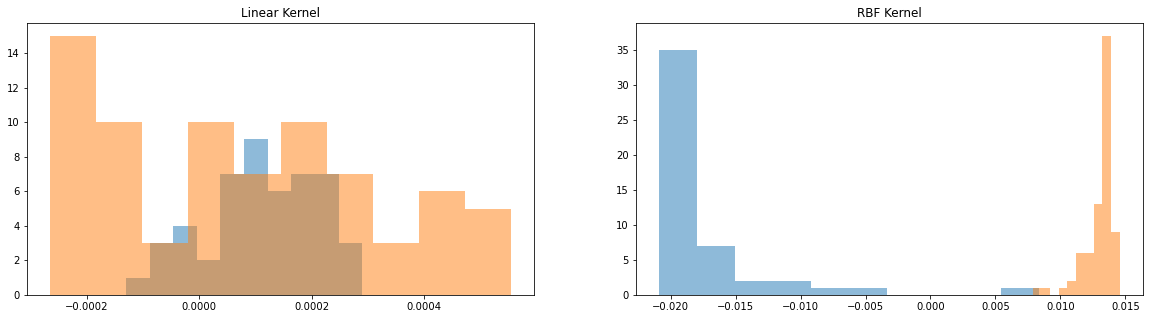

In [14]:
# Visualize results
fig, ax = plt.subplots(1,2,figsize = (20,5))

ax[0].hist(pred_lin_0 ,label='class 0',alpha=0.5)
ax[0].hist(pred_lin_1 ,label='class 1',alpha=0.5)
ax[0].set_title("Linear Kernel")

ax[1].hist(pred_rbf_0 ,label='class 0',alpha=0.5)
ax[1].hist(pred_rbf_1 ,label='class 1',alpha=0.5)
ax[1].set_title("RBF Kernel")

plt.show()

### Task 1.2

Which value would you use as a threshold to separate the classes? Use this threshold value to visualize the decision boundaries in a 2d grid (see example code below) and make predictions on the test set.

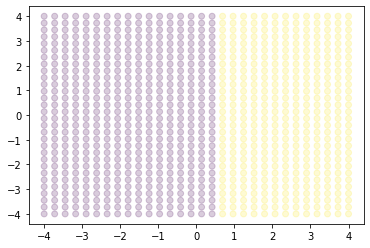

In [15]:
def plot_decision_boundary(predict_fn):
    ''' Plot decision boundary.

    predict_fn: function handle to a predict function that takes
                as input a data point x and outputs the predicted
                label t
    '''
    grid = np.meshgrid(np.linspace(-4, 4, 30), np.linspace(-4, 4, 30))
    grid_x, grid_y = grid[0].flatten(), grid[1].flatten()
    grid_t = np.array([
        predict_fn([x, y]) for x, y, in zip(grid_x, grid_y)])
    plt.scatter(grid_x, grid_y, c=grid_t, alpha=0.2)


# The following example has the decision boundary at x[0] = 0.5
predict_fn = lambda x: x[0] > 0.5
plot_decision_boundary(predict_fn)

In [16]:
# Visualize decision boundaries
def distance(smp,kernel = "rbf"):
    """computes the distance of the prediction y(x) to the projected mean of both classes."""
    if kernel == "rbf":
        m0 = np.mean(pred_rbf_0_train)
        m1 = np.mean(pred_rbf_1_train)
        
        y_x = predict(smp,X_train,alpha_rbf,rbf_kernel)
    elif kernel == "lin":
        m0 = np.mean(pred_lin_0_train)
        m1 = np.mean(pred_lin_1_train)
        
        y_x = predict(smp,X_train,alpha_lin,linear_kernel)
    else:
        "ERORRROROROROR"
    
    dist_0 = np.sqrt(np.abs(y_x - m0))
    dist_1 = np.sqrt(np.abs(y_x - m1))
    
    min_dist = min(dist_0,dist_1)
    
    return dist_0,dist_1,min_dist

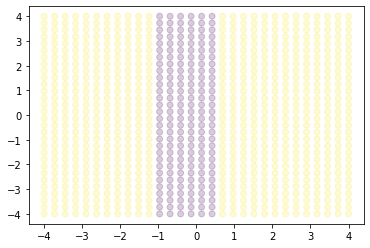

In [17]:
predict_fn_rbf = lambda x: distance(x[0],kernel = "rbf")[1] ==  distance(x[0], kernel = "rbf")[2]
plot_decision_boundary(predict_fn_rbf)

In [18]:
predict_fn_lin = lambda x: distance(x[0],kernel = "lin")[1] ==  distance(x[0], kernel = "lin")[2]
plot_decision_boundary(predict_fn_lin)

print("WHYYYYYYYYYYY is this happening for the linear kernel???????")

ValueError: setting an array element with a sequence.

In [19]:
predict(x[0],X_train,alpha_lin,linear_kernel)

-0.00011290372829504082